# First Steps in Climate4R

In this jupyter `R` notebook we describe the main basics of 3 core climate4R libraries, namely `loadeR`, `transformeR` and `visualizeR`. The main functionalities of each library are:
* `loadeR`: is an `R` package for climate data access building on the NetCDF-Java API. It allows user-friendly data access either from local or remote locations (e.g. OPeNDAP servers) and it is fully integrated with the User Data Gateway (UDG), a Climate Data Service deployed and maintained by the Santander Meteorology Group. loadeR has been conceived to work in the framework of both seasonal forecasting and climate change studies. Thus, it considers ensemble members as a basic dimension of its two main data structures (grid and station). Find out more about this package at the [loadeR wiki](https://github.com/SantanderMetGroup/loadeR/wiki).
* `transformeR`: is an `R` package for climate data manipulation and transformation including subsetting, regridding and data conversion. Find out more about this package at the [transformeR wiki](https://github.com/SantanderMetGroup/transformeR/wiki).
* `visualizeR`: is an `R` package for climate data visualization, with special focus on ensemble forecasting and uncertainty communication. It includes functions for visualizing climatological, forecast and evaluation products, and combinations of them. Find out more about this package at the [visualizeR wiki](https://github.com/SantanderMetGroup/visualizeR/wiki).

By the end of the notebook, the user would have acquired basic competences on the use of these libraries. We refer the reader to either the GitHub climate4R repository (https://github.com/SantanderMetGroup/climate4R) and the main reference manuscript [1] for more information.

The notebook is divided in 2 different parts:
 * [Basic operations with climate4R](#Basic-operations-with-climate4R)
 * [Case study: Computing climate change signals of global climate simulations in climate4R](#Case-study:-Computing-climate-change-signals-of-global-climate-simulations-in-climate4R)

To begin, we load the `R` libraries (please see module [01_Introduction](../01_Introduction) and/or the climate4R GitHub site (https://github.com/SantanderMetGroup/climate4R) for guidelines on the installation of the climate4R packages).


In [2]:
library(loadeR)
library(transformeR)
library(visualizeR)

In addition, we load the non-climate4R package `RColorBrewer` for visualization purposes.

In [3]:
library(RColorBrewer)

##  Basic operations with climate4R
In this section we explore the main functionalities of `loadeR`, `transformeR` and `visualizeR`.

### LoadeR - Loading climate data

In this section we describe how to load climate data into our `R` session in 2 different ways (1) by pointing to the User Data Gateaway (UDG, https://meteo.unican.es/trac/wiki/udg) climate service, and (2) by pointing directly to the NetCDF (.`nc`) files. Climate4R mostly works with `.nc` files, which is the most common data format in the climate sciences due to their ability to store multi-dimensional data. Nevertheless, `loadeR` also permits to load climate data from `.txt` files (this will be reviewed in future notebooks).

In order to exemplify the use of this loading functions we will retrieve small sets of data, that will load faster and taking less memory than "real world" examples. We will take an area around the Iberian Peninsula and 3 years (1995-1997):

In [22]:
lonLim = c(-10,  3)
latLim = c( 34, 45)
years = 1995:1999
spatial_resolution <- 0.1

#### (1) From UDG

The UDG provides a homogeneous access point to collections of impact-relevant climate variables and datasets. Whilst some of the datasets therein are open-access, others are available upon request (to register please visit (http://meteo.unican.es/udg-tap/home). For reproducibility, in this notebook we work with open-access datasets so there is no need to register in the UDG service. 

In the UDG, the datasets (both open and accesed with license) are associated to an UDG label. We can display the labels by calling `UDG.datasets()`.

In [ ]:
UDG.datasets()

if we focus on ERA-Interim reanalysis [2]...

In [ ]:
UDG.datasets("ERA-Interim")

In [ ]:
grid_udg <- loadGridData(dataset = 'ECMWF_ERA-Interim-ESD', 
                     var = "tas",
                     season = 1, 
                     years = years[1], # only the first year of the temporal period previously defined
                     lonLim = lonLim,
                     latLim = latLim,
                     )  

### To free memory
rm(grid_udg)

However if we focus on the E-OBS dataset [3]...

In [8]:
UDG.datasets("E-OBS")

Matches found for: OBSERVATIONS

Label names are returned, set argument full.info = TRUE to get more information



$OBSERVATIONS
[1] "E-OBS_v14_0.50regular"  "E-OBS_v14_0.44rotated"  "E-OBS_v14_0.25regular" 
[4] "E-OBS_v14_0.22rotated"  "E-OBS_v17_0.50regular"  "E-OBS_v17_0.44rotated" 
[7] "E-OBS_v17_0.25regular"  "E-OBS_v17_0.22rotated"  "E-OBS_v21e_0.10regular"

```R
grid_udg <- loadGridData(dataset = "E-OBS_v17_0.50regular", 
                     var = "tas",
                     season = 1:12, 
                     years = years,
                     lonLim = lonLim,
                     latLim = latLim,
                     ) 
```

You will need authorization to access E-OBS data stored within the UDG, but this data set can also be side loaded by downloading the corresponding files from ECAD.
This is exemplified next.

#### (2) Directly from .nc (or.ncml) data

Here, we illustrate how to feed `loadGridData` with `.nc` files to load them into our `R` session. For this we work with E-OBS [2], which is a observational gridded dataset over Europe ((https://www.ecad.eu/download/ensembles/download.php)). In the below chunk of code we show how to download the `.nc` mean temperature (`tg`) file directly from `R`. 

In [25]:
eobs.varname <- "tg"
eobs.data <- sprintf("%s_ens_mean_%sdeg_reg_1995-2010_v25.0e.nc", 
                     eobs.varname, spatial_resolution)
if (! file.exists(eobs.data))
  download.file(
    sprintf("https://knmi-ecad-assets-prd.s3.amazonaws.com/ensembles/data/Grid_%sdeg_reg_ensemble/%s", 
            spatial_resolution, eobs.data),
    eobs.data
  )

Once we have downloaded the `.nc` file, we call function `loadGridData` which permits to load gridded data intoy our `R` session. In the `dataset` parameter we set the path to the `.nc` file ( consider tpying `?loadGridData` for more information). An alternative acces to the `grid` object can be found [here](https://meteo.unican.es/work/training-climate4r-f43534662sfw/modulo2/grid.rds) in `.rds` format to speed-up the loading during the session.

In [ ]:
grid <- loadGridData(dataset = eobs.data, 
                     var = "tg",
                     season = 1:12, 
                     years = years,
                     lonLim = lonLim,
                     latLim = latLim,
                     )  

### alternatively use readRDS() to load the .RDS files (e.g., grid <- readRDS(""))

**¿How does a climate4R object look?** To get insight on the internal structure of a climate4R object we call function `str()`.

In [11]:
str(grid)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "tg"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi FALSE
  ..- attr(*, "description")= chr "mean temperature"
  ..- attr(*, "units")= chr "Celsius"
  ..- attr(*, "longname")= chr "tg"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "none"
  ..- attr(*, "verification_time")= chr "none"
 $ Data    : num [1:1826, 1:111, 1:131] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:131] -9.95 -9.85 -9.75 -9.65 -9.55 ...
  ..$ y: num [1:111] 34 34.1 34.2 34.3 34.4 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.1
  ..- attr(*, "resY")= num 0.1
 $ Dates   :List of 2
  ..$ start: chr [1:1826] "1995-01-01 00:00:00 GMT" "1995-01-02 00:00:00 GMT" "1995-01-03 00:00:00 GMT" "1995-01-04 00:00:00 GMT" ...
  ..$ end  : chr [1:1826] "1995-01-01 00:00:00 GMT" "1995-01-02 00:00:00 

We distinguish a list of 4 members. The first one contains metadata information about the variable(s) within the object; the second one contains the matrix or array of climate data; the third one contains information about the coordinates of the regular grid; the fourth one contains the dates of the samples. 

**Diccionario y vocabulario:** In order to load and work with harmonized data we can repeat the above operation using a dictionary file, that defines the necessary name and unit transformations to the standard parameters. Function `C4R.vocabulary` displays the climate4R standard variable naming and units:

In [12]:
C4R.vocabulary()

identifier,standard_name,units
<fct>,<fct>,<fct>
hurs,2-meter relative humidity,%
hursmax,maximum 2-meter relative humidity,%
hursmin,minimum 2-meter relative humidity,%
huss,2-meter specific humidity,kg.kg-1
hussmax,maximum 2-meter specific humidity,kg.kg-1
hussmin,minimum 2-meter specific humidity,kg.kg-1
lm,land binary mask,1
orog,surface altitude,m
ps,air pressure at surface level,Pa


In this case, the only non-standard parameter in the E-OBS dataset is the variable name ("tg"), however, we could perform further loading requests using the standard name if a dictionary file is crated previously (see the [`loadeR` wiki](https://github.com/SantanderMetGroup/loadeR/wiki/Harmonization)). This can be done easily, for instance, in the following manner:

In [ ]:
file.create("./dicEOBS.dic")
writeLines(c("identifier,short_name,time_step,lower_time_bound,upper_time_bound, cell_method,offset,scale,deaccum,derived,interface",
             "tas,tg,24h,0,24,mean,0,1,0,0,"), "./dicEOBS.dic")

We call again function `loadGridData` but pointing the parameter `dictionary` to the `.dic` file built in the previous cell code. 

In [33]:
grid <- loadGridData(dataset = eobs.data, 
                     var = "tas",
                     season = 1:12, 
                     years = years,
                     lonLim = lonLim,
                     latLim = latLim,
                     dictionary = "dicEOBS.dic"
                     ) 
sprintf("And now the variable name is %s", grid$Variable$varName)

[1] "And now the variable name is tas"

### TransformeR - Transformation of climate data
In this section we explore some main functionalities of package `transformeR`. In particular we describe (1) how to select/subset climate data by date and/or coordinates (i.e., subet the January months for the period 1980-1985) from a climate4R object, (2) how to aggregate climate data based on an index/statistic along a spatial and/or temporal dimension, and (3) how to compute a climatology of a given statistic.

**(1) Select/subset climate data**: `subsetGrid`

In [9]:
### Subset the January months
grid_january <- subsetGrid(grid, season = 1)
str(grid_january$Data)

### Subset the temporal period 1995-1996
grid_1995_1996 <- subsetGrid(grid, years = 1995:1996)
str(grid_1995_1996$Data)

### Seleccionar el dominio de la Península Ibérica
grid_madrid <- subsetGrid(grid, lonLim = -3.5, latLim = 40.5)
str(grid_madrid$Data)

 num [1:155, 1:111, 1:131] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 num [1:731, 1:111, 1:131] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 num [1:1826(1d)] 4.92 3.56 1.08 2.02 6.84 ...
 - attr(*, "dimensions")= chr "time"


**(2) Aggregate climate data**: `aggregateGrid`

In [11]:
### Compute the yearly mean
grid_annual <- aggregateGrid(grid, aggr.y = list(FUN = 'mean', na.rm = TRUE))
str(grid_annual$Data)

### Compute the monthly mean
grid_season <- aggregateGrid(grid, aggr.m = list(FUN = 'mean', na.rm = TRUE))
str(grid_season$Data)

 num [1:5, 1:111, 1:131] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 num [1:60, 1:111, 1:131] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"


**(3) Compute climatologies**: `climatology`

In [13]:
### Compute the mean climatology
grid_clim <- climatology(grid, clim.fun = list(FUN = 'mean', na.rm = TRUE))
str(grid_clim$Data)

 num [1, 1:111, 1:131] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 - attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 - attr(*, "climatology:fun")= chr "mean"


### VisualizeR - Visualization of climate data
In this section we explore the main functionalities of `visualizeR`. In particular we illustrate the use of 2 core functions of the package, namely `spatialPlot` and `temporalPlot`. The former permits to display spatial maps whilst the latter graphic temporal series (we recomend the user to type `?spatialPlot` and `?temporalPlot` for more information). We use the objects previously computed above to illustrate the functioning of both functions. 

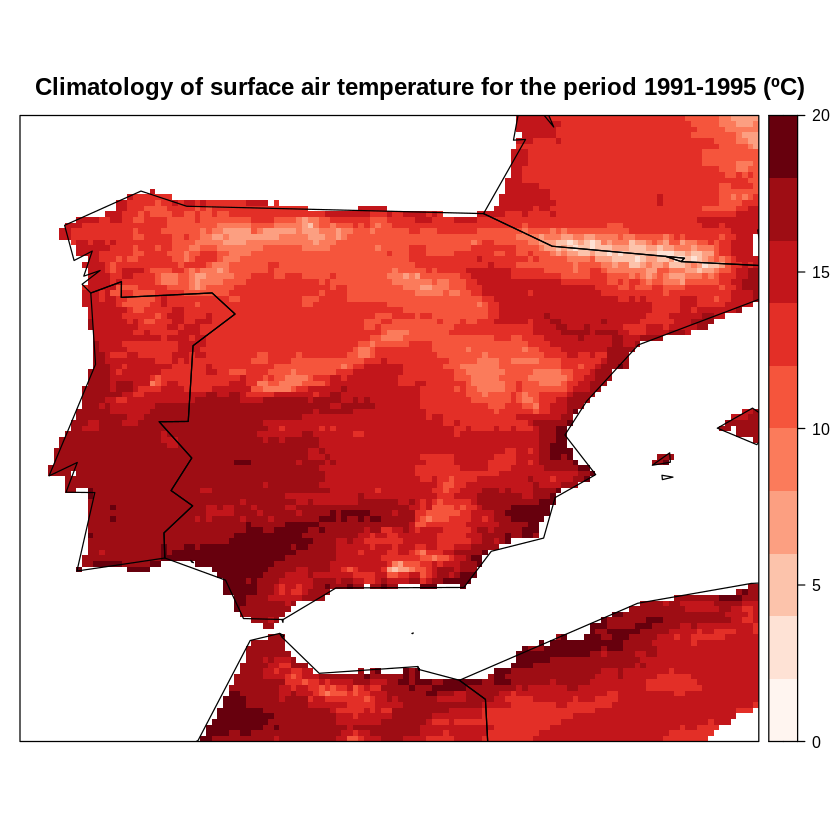

In [14]:
### Mean climatology
color_palette <- colorRampPalette(brewer.pal(n = 9, "Reds"))
spatialPlot(grid_clim,
            backdrop.theme = "countries",
            at = seq(0, 20, 2), 
            col.regions = color_palette,
            main = 'Climatology of surface air temperature for the period 1991-1995 (ºC)'
            )

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
pad applied on the interval: day



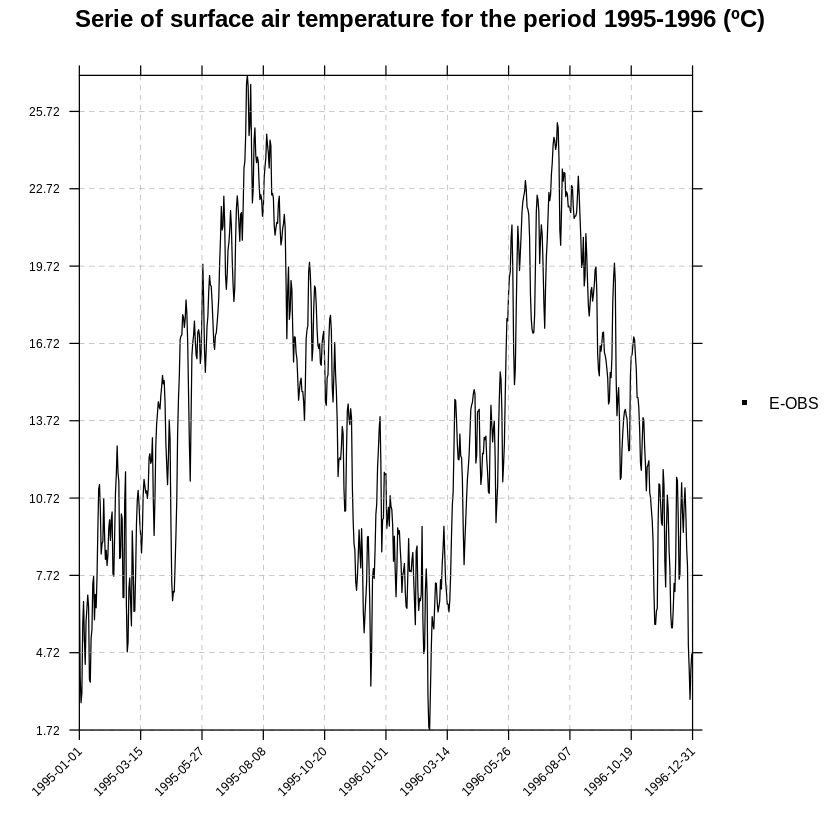

In [15]:
### Temporal serie 1995-1996 
temporalPlot("E-OBS" = grid_1995_1996, 
             xyplot.custom = list(xlab = "",
                                  ylab = "",
                                  main = "Serie of surface air temperature for the period 1995-1996 (ºC)"
                                 )
            )

pad applied on the interval: day

pad applied on the interval: day



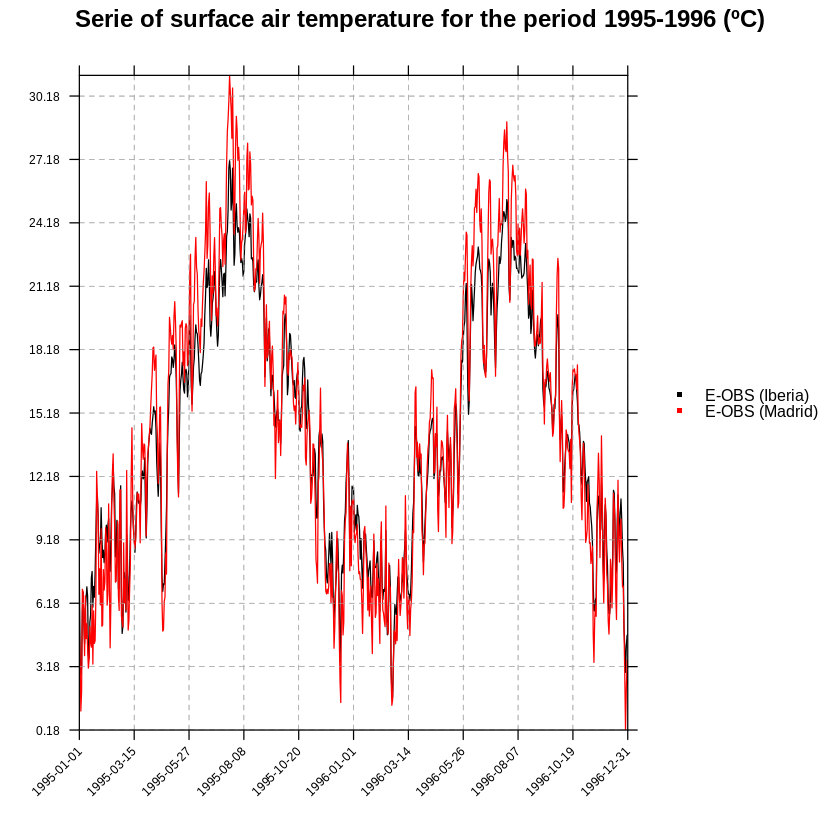

In [20]:
### Temporal serie 1995-1996 for (1) Iberia and (2) Madrid
grid_1995_1996_madrid <- subsetGrid(grid_1995_1996, 
                                    years = 1995:1996,
                                    lonLim = -3.5, 
                                    latLim = 40.5)

temporalPlot("E-OBS (Iberia)" = grid_1995_1996, 
             "E-OBS (Madrid)" = grid_1995_1996_madrid,
             xyplot.custom = list(xlab = "",
                                  ylab = "",
                                  main = "Serie of surface air temperature for the period 1995-1996 (ºC)"
                                 )
            )

**Exercises:** respond to the following questions

In [ ]:
### Select all the July samples/days

### Aggregate all July months using the mean (i.e., for each month of July compute the mean over their 31-day period)

### Display the temporal serie

### Compute the same temporal serie but for January

### Display both July and January temporal series in the same temporal serie plot.

In [ ]:
### Subset the Iberian peninsula (coordinates: lonLim = c(-8,2), latLim = c(36,44))

### Compute the climatology of the 2nd quantile using function `quantile` from base R 
### (consider typing ?quantile).

### Display the spatial map

To free memory...

In [ ]:
### To free memory
rm(grid, grid_january, grid_madrid, grid_1995_1996, grid_1995_1996_madrid, grid_annual, grid_season, grid_clim)
gc()

## Case study: Computing climate change signals of global climate simulations in climate4R
In this section we work over a case of study with climate4R. The main purpose is to compute climate change signals (i.e., difference of an index/statistic between its future and historical value) of global climate simulations. In particular we focus on the 12th run of the EC-Earth [4] climate model, which is freely available from UDG. 

To compute the signals we load the air surface temperatue (`tas`) of both the historical and RCP8.5 (Radiative Concentration Pathway of 8.5 W/m2) emission scenarios, using `loadGridData` function. To call `loadGridData` we previously have to check the UDG label by typing `UDG.datasets(pattern = "CMIP5-subset")`, and then call `dataInventory` to display the available variables. 

In [ ]:
UDG.datasets(pattern = "CMIP5-subset")
di <- dataInventory("CMIP5-subset_EC-EARTH_r12i1p1_historical")

We parameterize the case study with the following objects:

In [29]:
years_hist <- 1990:2000
years_rcp85 <- 2090:2100

var <- "tas"

The cell below shows how to load both scenarios into our `R` session. Alternatively we provide the corresponding [historical](https://meteo.unican.es/work/training-climate4r-f43534662sfw/modulo2/grid_hist.rds) and [RCP8.5](https://meteo.unican.es/work/training-climate4r-f43534662sfw/modulo2/grid_rcp85.rds) objects as `.rds` files to speed-up the loading of data during the session.  

In [ ]:
# NOTE: For computational efficieny we lean on a 10-year period instead of 
# the 30-year one commonly used in climate change studies

### Loading the historical scenario (1990:2000)
grid_hist <- loadGridData('CMIP5-subset_EC-EARTH_r12i1p1_historical', 
                     var = var,
                     years = years_hist, 
                     lonLim = lonLim, 
                     latLim = latLim
                     )  

### Loading the RCP8.5 scenario (2090:2100)
grid_rcp85 <- loadGridData('CMIP5-subset_EC-EARTH_r12i1p1_rcp85', 
                     var = var,
                     years = years_rcp85,
                     lonLim = lonLim, 
                     latLim = latLim
                     ) 

### alternatively use readRDS() to load the .RDS files (e.g., grid_hist <- readRDS("url_historical"))

We compute the mean climatologies of air surface temperature in both scenarios using the function `climatology`...

In [ ]:
### Climatology in the historical scenario
grid_hist_clim <- climatology(grid_hist, 
                              clim.fun = list(FUN = "mean", na.rm = TRUE))

### Climatology in the RCP8.5 scenario
grid_rcp85_clim <- climatology(grid_rcp85, 
                               clim.fun = list(FUN = "mean", na.rm = TRUE))

...and then use these fields to compute the climate change signal by calling `transformeR` function `gridArithmetics`.

In [36]:
### Climate change signal
climate_change_signal <- gridArithmetics(grid_rcp85_clim, 
                                         grid_hist_clim, 
                                         operator = "-")

Finally we call `spatialPlot` to display the signal.

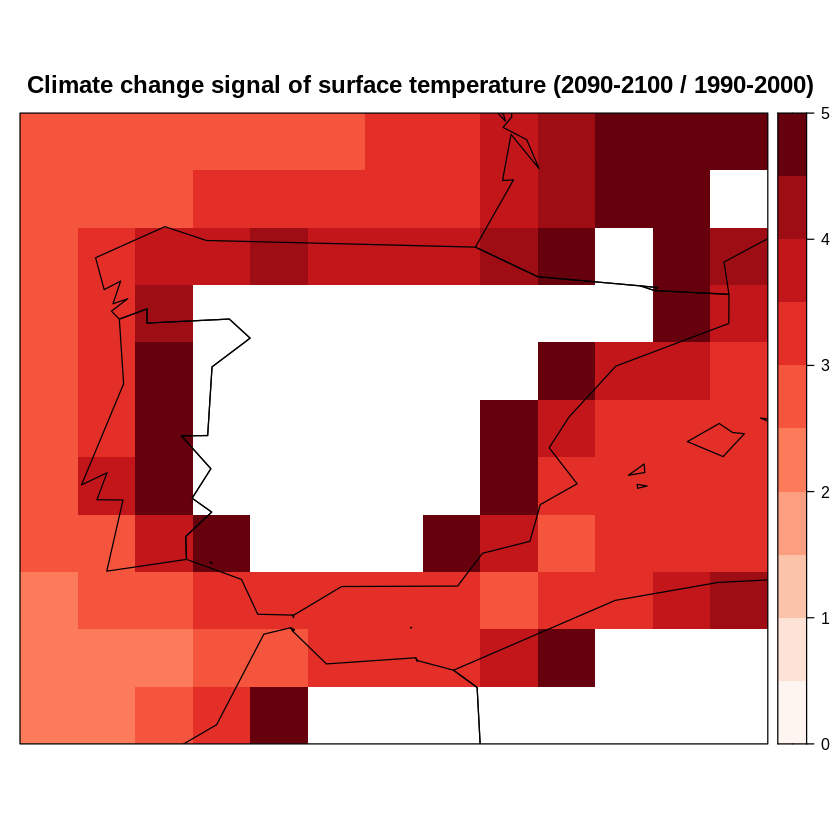

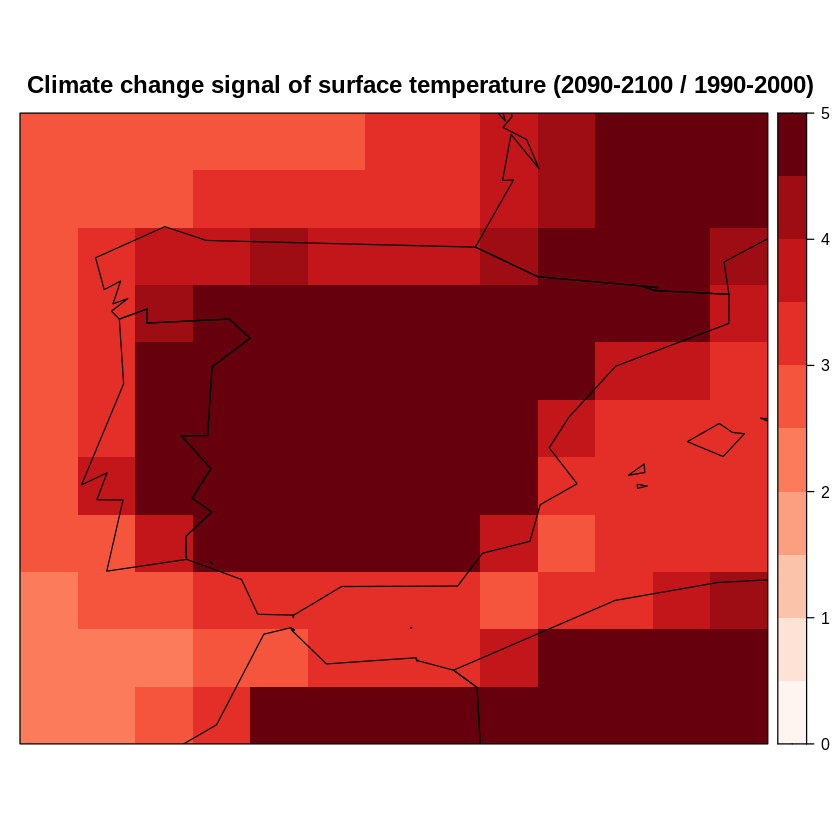

In [37]:
### Displaying signal (without set.min and set.max)
color_palette <- colorRampPalette(brewer.pal(n = 9, "Reds"))
spatialPlot(climate_change_signal,
            backdrop.theme = "countries",
            at = seq(0, 5, 0.5),
            col.regions = color_palette,
            main = 'Climate change signal of surface temperature (2090-2100 / 1990-2000)'
            )

### Displaying signal (with set.min and set.max)
spatialPlot(climate_change_signal,
            backdrop.theme = "countries",
            at = seq(0, 5, 0.5),
            set.min = 0, 
            set.max = 5,
            col.regions = color_palette,
            main = 'Climate change signal of surface temperature (2090-2100 / 1990-2000)'
            )

**Exercises:** answer the following questions considering the geographical area of Argentina:

In [ ]:
### Load historical scenario

### Load RCP8.5 scenario

### Compute the following index
 ### Mean
 ### Mean of summer months
 ### Mean of winter months
 ### Summer Index (SU): number of annual days with values exceeding 25ºC (consider using function binaryGrid)

### Compute the climate change signal of the above index
 ### Mean
 ### Mean of summer months
 ### Mean of winter months
 ### Summer Index (SU): number of annual days with values exceeding 25ºC 

### Display the spatial maps of the climate change signals
 ### Mean
 ### Mean of summer months
 ### Mean of winter months
 ### Summer Index (SU): number of annual days with values exceeding 25ºC 


### Display the temporal serie of the Summer Index for the entire Argentina (label x: year, label y: nº of days)

### Display the temporal serie of the Summer Index of Buenos Aires and compare it to the value for the 
### entire Argentina (label x: year, label y: nº of days)

**Interpolation and multi-member objects:** `interpGrid` and `bindGrid`
Below we illustrate how to create multi-member climate4R objects using function `bindGrid`. These might be of interest when working with different climate simulations or different simulation runs, for example. TO illustrate this situation we download the CNRM-CM5 simulation for the same period and domain than the ones previously set for the EC-Earth. Alternatively we provide the [CNRM object](https://meteo.unican.es/work/training-climate4r-f43534662sfw/modulo2/grid_rcp85_cnrm.rds) as `.rds` files to speed-up the loading of data during the session.

In [40]:
### Loading the RCP8.5 scenario (2090:2100) for the global climate model CNRM-CM5
grid_rcp85_cnrm <- loadGridData('CMIP5-subset_CNRM-CM5_r1i1p1_rcp85', 
                     var = var,
                     years = years_rcp85,
                     lonLim = lonLim, 
                     latLim = latLim,
                     ) 

### Climatology in the RCP8.5 scenario
grid_rcp85_cnrm_clim <- climatology(grid_rcp85_cnrm, 
                                    clim.fun = list(FUN = "mean", na.rm = TRUE))


print("The EC-Earth spatial resolution is...")
str(grid_rcp85_clim$xyCoords)

print("The CNRM-CM5 spatial resolution is...")
str(grid_rcp85_cnrm_clim$xyCoords)

[1] "The EC-Earth spatial resolution is..."
List of 2
 $ x: num [1:13] -10.12 -9 -7.88 -6.75 -5.62 ...
 $ y: num [1:11] 34.2 35.3 36.4 37.6 38.7 ...
 - attr(*, "projection")= chr "LatLonProjection"
 - attr(*, "resX")= num 1.12
 - attr(*, "resY")= num 1.12
[1] "The CNRM-CM5 spatial resolution is..."
List of 2
 $ x: num [1:10] -9.84 -8.44 -7.03 -5.62 -4.22 ...
 $ y: num [1:9] 34.3 35.7 37.1 38.5 39.9 ...
 - attr(*, "projection")= chr "LatLonProjection"
 - attr(*, "resX")= num 1.41
 - attr(*, "resY")= num 1.4


Since the datasets considered do not have the same spatial resolution we can not bind them into a single climate4R object. To overcome this issue, we call function `interpGrid` to interpolate one of the grids to the spatial resolution of the other simulation using the bilinear method. 

In [ ]:
grid_rcp85_cnrm_clim_interp <- interpGrid(grid_rcp85_cnrm_clim, 
                                          new.coordinates = getGrid(grid_rcp85_clim),
                                          method = 'bilinear')

Finally we bind the grids into a single climate4R object...

In [ ]:
grid_rcp85_2gcms <- bindGrid(grid_rcp85_clim, 
                             grid_rcp85_cnrm_clim_interp, 
                             dimension = "member")
str(grid_rcp85_2gcms$Data)

We call `spatialPlot` to display the fields.

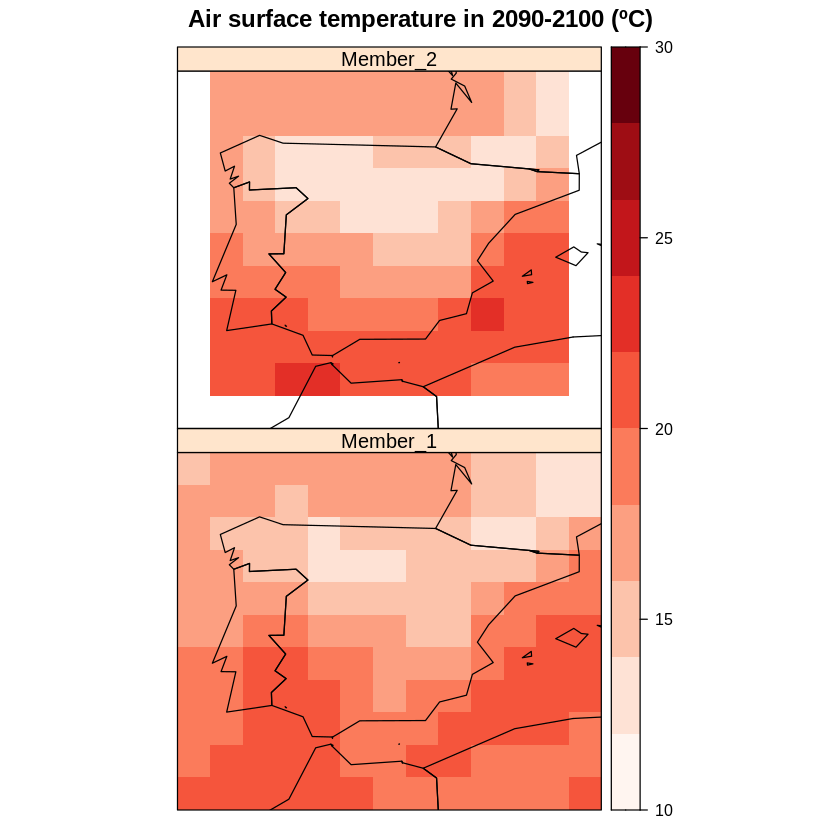

In [43]:
### Displaying signal
spatialPlot(grid_rcp85_2gcms,
            backdrop.theme = "countries",
            at = seq(10, 30, 2),
            set.min = 10, 
            set.max = 30,
            col.regions = color_palette,
            main = 'Air surface temperature in 2090-2100 (ºC)'
            )

**Exercises:** can you compute the ensemble mean? and the ensemble dispersion (standard deviation)? (consider using function aggregateGrid) Display the fields.

In [ ]:
### Ensemble mean

### Ensemble standard deviation

## References

[1] Iturbide, Maialen, et al. "The R-based climate4R open framework for reproducible climate data access and post-processing." Environmental Modelling & Software 111 (2019): 42-54.*

[2] Dee, Dick P., et al. "The ERA‐Interim reanalysis: Configuration and performance of the data assimilation system." Quarterly Journal of the royal meteorological society 137.656 (2011): 553-597.

[3] Cornes, Richard C., et al. "An ensemble version of the E‐OBS temperature and precipitation data sets." Journal of Geophysical Research: Atmospheres 123.17 (2018): 9391-9409.

[4] Doblas Reyes, Francisco, et al. "Using EC-Earth for climate prediction research." ECMWF Newsletter 154 (2018): 35-40.